# <center> Parte I: Análise Exploratóra</center>

## 1. RMS Titanic

- Navio fabricado em 1911, na Irlanda do Norte
- Viagem inaugural iniciada em 10/04/1912 e naufrágio após 5 dias
- Pessoas a bordo: 2.224, sendo 1.316 passageiros

## 2. Data analysis

- Dataset: arquivo csv
- Conteúdo: dados sobre os passageiros
- Objetivo: Definir o perfil dos passageiros
- Ferramentas utilizadas: Linguagem Python e biblioteca Pandas; códigos escritos e executados no Jupyter Notebook

## 3. Importação (dataset e bibliotecas)

- Importação das bibliotecas necessárias (Pandas e Numpy)
- Importação e leitura do dataset utilizando a biblioteca Pandas

In [3]:
import pandas as pd
import numpy as np

tit = pd.read_csv('/content/titanic_data.csv')

## 4. Estrutura do dados

- colunas categorizando os dados
- linhas representando a quantidade de registros

In [4]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(f'O dataset possui registros de {round((890/1316)*100, 1)}% do total de passageiros')

O dataset possui registros de 67.6% do total de passageiros


## 5. Visualização dos dados tabulares
- Exploração do formato dos dados
- Verificação das informações disponíveis
- Visualização parcial (10 primeiras e 8 últimas linhas)

In [6]:
tit.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
tit.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


## 6. Limpeza dos dados: valores null
- Verificando existência de dados vazios
- Limpando os dados para não impactar os cálculos posteriores

In [8]:
tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
tit.fillna(0, inplace=True)

In [10]:
tit.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 7. Limpeza dos dados: colunas inutilizadas
- Verificar colunas sem previsão de utilização
- Excluir colunas Sibsp, Parch e Ticket

In [11]:
tit = tit.drop(['SibSp','Parch','Ticket'], axis=1)

## 8. Adequação dos dados: renomeando colunas
- Renomear rótulo das colunas para termos na língua portuguesa
- Objetivo: facilitar a leitura dos dados pelos envolvidos no projeto

In [12]:
tit.rename(columns={'PassengerId':'IdPassageiro', 'Survived':'Sobreviveu', 'Pclass':'Classe', 'Name':'Nome', 'Sex':'Sexo', 'Age':'Idade', 'Fare':'Tarifa', 'Cabin':'Cabine', 'Embarked':'Embarque'}, inplace=True)

## 9. Adequação dos dados: traduzindo códigos
- Substituir códigos por termos semânticos, facilitando a leitura dos dados
- Coluna sobreviveu: (0 => Não, 1 => Sim)

In [13]:
tit['Sobreviveu'].replace([0, 1], ['Não', 'Sim'], inplace=True)

## 10. Adequação dos dados: traduzindo vocabulário
- Substituir termos em inglês pelos equivalentes em português
- Coluna sexo: (female => Mulher, male   => Homem)

In [14]:
tit['Sexo'].replace(['female', 'male'], ['Mulher', 'Homem'], inplace=True)

# <center> Parte II: Resultados </center>

## 11. Passageiros (por sexo)

In [15]:
tit['Sexo'].value_counts()

Homem     577
Mulher    314
Name: Sexo, dtype: int64

## 12. Sobreviventes e vítimas

In [16]:
tit['Sobreviveu'].value_counts()

Não    549
Sim    342
Name: Sobreviveu, dtype: int64

## 13. Vítimas: quantidade de mulheres

In [17]:
len(tit[(tit['Sexo'] == 'Mulher') & (tit['Sobreviveu'] == 'Não')])

81

## 14. Sobreviventes: proporção por sexo

In [18]:
s_mc = tit[(tit['Sexo'] == 'Mulher') & (tit['Sobreviveu'] == 'Sim')]

s_m = len(s_mc)

In [19]:
s_hc = tit[(tit['Sexo'] == 'Homem') & (tit['Sobreviveu'] == 'Sim')]

s_h = len(s_hc)

In [20]:
s = tit['Sobreviveu'].value_counts().get('Sim', 0)

In [21]:
sm = round(((s_m/s) * 100), 2)
sh = round(((s_h/s) * 100), 2)
print(f'Sobreviventes: {sm}% mulheres e {sh}% homens')

Sobreviventes: 68.13% mulheres e 31.87% homens


In [67]:
sobreviventes_sexo = round(tit[tit['Sobreviveu'] == 'Sim']['Sexo'].value_counts(normalize=True) * 100, 2)
sobreviventes_sexo

Mulher    68.13
Homem     31.87
Name: Sexo, dtype: float64

## 15. Vítimas: por idade

In [66]:
tit_idade = tit[tit['Sobreviveu'] == 'Não']
tit_idade['Idade'].value_counts()

0.0     125
21.0     19
28.0     18
25.0     17
18.0     17
       ... 
15.0      1
36.5      1
23.5      1
55.5      1
74.0      1
Name: Idade, Length: 78, dtype: int64

## 16. Sobreviventes: média de idade dos homens

In [23]:
tit_hsobr = tit[(tit['Sobreviveu'] == 'Sim') & (tit['Sexo'] == 'Homem')]
round((tit_hsobr['Idade'].mean()), 1)

23.3

## 17. Sobreviventes: proporção por sexo entre passageiros prioritários (mulheres e crianças 0-15)

In [62]:
sobr_prior = tit[(tit['Sexo'] == 'Mulher') | (tit['Idade'] <= 15)]
round((sobr_prior.groupby('Sexo')['Sobreviveu'].value_counts(normalize=True).unstack()), 2) * 100

Sobreviveu,Não,Sim
Sexo,,
Homem,77.0,23.0
Mulher,26.0,74.0


## 18. Passageiros por classe

In [25]:
tit['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

## 19. Sobreviventes por classe

In [26]:
sobr_class = tit[tit['Sobreviveu'] == 'Sim']
sobr_class = round(((sobr_class['Classe'].value_counts(normalize=True)) * 100), 2)
sobr_class

1    39.77
3    34.80
2    25.44
Name: Classe, dtype: float64

## 20. Sobreviventes e vítimas (por sexo e classe)

In [68]:
tit.groupby('Sobreviveu')[['Sexo', 'Classe']].value_counts().unstack()

Classe              1   2    3
Sobreviveu Sexo               
Não        Homem   77  91  300
           Mulher   3   6   72
Sim        Homem   45  17   47
           Mulher  91  70   72

## 21. Sobreviventes: homens entre 24 a 30 anos na classe 3


In [28]:
cond1 = tit[(tit['Sexo'] == 'Homem') & (tit['Idade'] >=24) & (tit['Idade'] <= 30) & (tit['Classe'] == 3) & (tit['Sobreviveu'] == 'Sim')]
len(cond1)

12

## 22. Vítimas: homens entre 24 a 30 anos na classe 2

In [29]:
cond2 = tit[(tit['Sexo'] == 'Homem') & (tit['Idade'] >=24) & (tit['Idade'] <= 30) & (tit['Classe'] == 2) & (tit['Sobreviveu'] == 'Não')]
len(cond2)

24

## 23. Embarques por cidade

In [57]:
tit['Embarque'].value_counts()

S    644
C    168
Q     77
0      2
Name: Embarque, dtype: int64

In [31]:
embarque = round(tit['Embarque'].value_counts(normalize=True) * 100, 2)

print("Porcentagem de embarque em cada cidade:")
embarque


Porcentagem de embarque em cada cidade:


S    72.28
C    18.86
Q     8.64
0     0.22
Name: Embarque, dtype: float64

<Axes: >

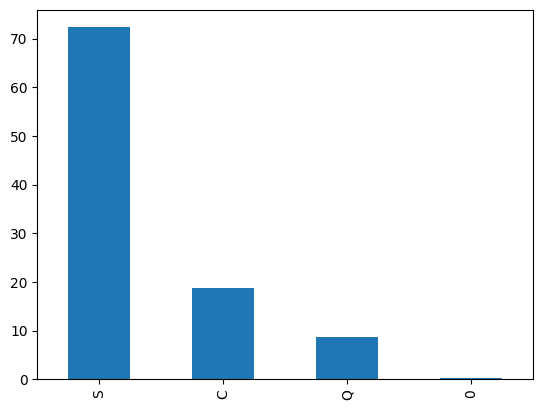

In [32]:
embarque.plot(kind='bar')